In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import cv2

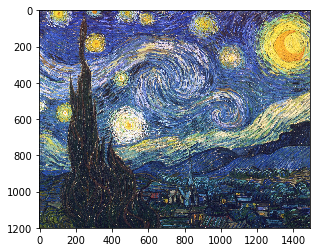

In [120]:
img = cv2.imread('data/starry_starry_night.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [121]:
img.shape

(1200, 1493, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


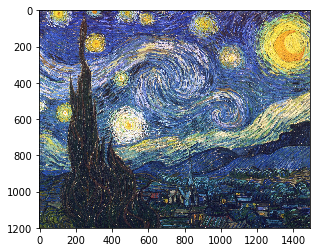

In [122]:
delta = np.random.normal(loc=1, scale=.03, size=img.shape[0:2])
delta = np.expand_dims(delta, -1)

np.repeat(delta, 3, -1) 

dimg = np.multiply(img, delta).astype(np.int16)
plt.imshow(dimg)

In [123]:
height, width, ndims = img.shape
vid = cv2.VideoWriter('test.mp4', cv2.VideoWriter_fourcc(
        'm', 'p', '4', 'v'), 30, (width, height), isColor=True)

N = 30
#fig, axs = plt.subplots(nrows=N, figsize=(10, 50))
myimg = np.copy(img)
deltas = []
inverses = []

for _ in range(3):
    for i in range(N):
        
        delta = np.random.normal(loc=1, scale=.03, size=myimg.shape[0:2])
        delta = np.expand_dims(delta, -1)
        np.repeat(delta, 3, -1) 

        dimg = np.multiply(myimg, delta)
        myimg = dimg

        vid.write(cv2.cvtColor(dimg.astype(np.uint8),cv2.COLOR_RGB2BGR))
        deltas.append(delta)
        inverses.append(1.0/delta)

    for inv in reversed(inverses):

        dimg = np.multiply(myimg, inv)
        myimg = dimg
        vid.write(cv2.cvtColor(dimg.astype(np.uint8),cv2.COLOR_RGB2BGR))

    
vid.release()

KeyboardInterrupt: 

# Try Addition

In [20]:
img = cv2.imread('data/beach_la.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [21]:
height, width, ndims = img.shape
vid = cv2.VideoWriter('outvids/beach_la.mp4', cv2.VideoWriter_fourcc(
        'm', 'p', '4', 'v'), 30, (width, height), isColor=True)

N = 60
high = 4

#fig, axs = plt.subplots(nrows=N, figsize=(10, 50))
myimg = np.copy(img)
inverses = []
sign = np.random.choice([-1, 1])

for j in range(5):
    
    sign = np.random.choice([-1, 1])

    
    if j %3 == 0:
        myimg = np.copy(img)
        
    for i in range(N):
        
        med = np.random.uniform(low=1, high=high)
        delta = sign*np.random.normal(loc=med, scale=med/2, size=myimg.shape[0:2])
        delta = np.expand_dims(delta, -1)
        
        
        dimg = myimg + delta
        myimg = dimg

        vid.write(cv2.cvtColor(np.clip(dimg.astype(np.uint8), a_min=0, a_max=255),cv2.COLOR_RGB2BGR))
        inverses.append(-1*delta)

    for inv in reversed(inverses):

        dimg = myimg + inv
        myimg = dimg
        vid.write(np.clip(cv2.cvtColor(dimg.astype(np.uint8),cv2.COLOR_RGB2BGR), a_min=0, a_max=255))

    
vid.release()

KeyboardInterrupt: 

In [217]:
delta.shape

(744, 1777, 1)

# Pretty Good

## Now let's try chunks

In [127]:
myimg.shape

(1200, 1493, 3)

In [165]:
def get_chunk_delta(myimg):
    
    C = 2
    sign = np.random.choice([-1, 1])
    
    delta = sign*np.random.normal(loc=3, scale=2, size=np.array(myimg.shape[0:2])//C)
    delta = np.repeat(delta, C, -1)
    delta = np.repeat(delta, C, 0)
    
    hp, wp, _ = np.array(myimg.shape)%C
    padding = [ [0, hp], [0, wp]]
    delta = np.pad(delta, pad_width=padding, mode='constant')
    
    delta = np.expand_dims(delta, -1)
    delta = np.repeat(delta, 3, -1) 

    return delta

In [166]:
myimg = np.copy(img)
height, width, ndims = myimg.shape
vid = cv2.VideoWriter('test.mp4', cv2.VideoWriter_fourcc(
        'm', 'p', '4', 'v'), 60, (width, height), isColor=True)

N = 30
#fig, axs = plt.subplots(nrows=N, figsize=(10, 50))
deltas = []
inverses = []

for _ in range(3):
    for i in range(N):
        
        delta = get_chunk_delta(myimg)

        dimg = myimg + delta
        myimg = dimg

        vid.write(cv2.cvtColor(np.clip(dimg.astype(np.uint8), a_min=0, a_max=255),cv2.COLOR_RGB2BGR))
        deltas.append(delta)
        inverses.append(-1*delta)

    for inv in reversed(inverses):

        dimg = myimg + inv
        myimg = dimg
        vid.write(np.clip(cv2.cvtColor(dimg.astype(np.uint8),cv2.COLOR_RGB2BGR), a_min=0, a_max=255))

    
vid.release()

In [ ]:
ffmpeg -i video.mp4 -i audio.wav -c:v copy -c:a aac -strict experimental output.mp4

In [ ]:
ffmpeg -i output_temp -vcodec libx264 -f mp4 output_dest